Όλοι οι αλγόριθμοι κατηγοριοποίησης του Scikit-learn βρίσκονται εδώ
http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Αρχικά φορτώνουμε τις απαραίτητες βιβλιοθήκες για το χειρισμό του dataset (Pandas),
τη διαχείριση πράξεων (numpy), και την προβολή των δεδομένων σε plots (matplotlib και seaborn)

Βιβλιοθήκες που θα χρειαστείτε τις εγκαθιστάτε με:
pip install numpy scipy matplotlib ipython[all] patsy pandas scikit-learn seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Datasets για πειράματα: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
bc.target[[10, 50, 85]]

array([0, 1, 0])

In [3]:
bc.target_names

array(['malignant', 'benign'],
      dtype='|S9')

In [4]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='|S23')

In [5]:
bc.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [6]:
clm= np.append(bc['feature_names'],['target'])

In [7]:
df = pd.DataFrame(data= np.c_[bc['data'], bc['target']], columns=clm)

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
dfsub=df[['mean radius','mean area','worst radius','target']]

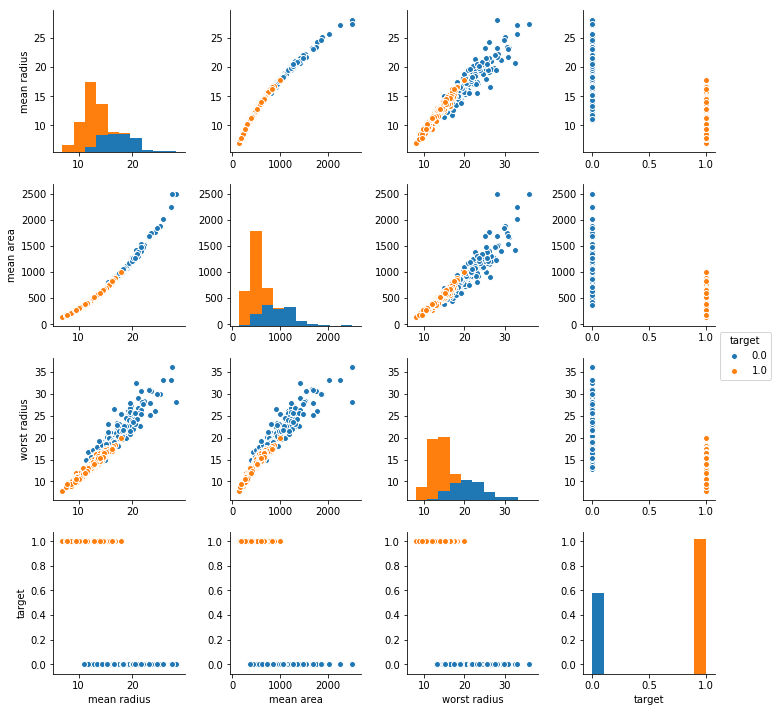

In [10]:
sns.pairplot(dfsub, hue='target')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop('target',axis=1)

In [13]:
y=df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
model = GaussianNB()

In [17]:
model.fit(X_train,y_train)

GaussianNB(priors=None)

In [18]:
predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 52   8]
 [  1 110]]


             precision    recall  f1-score   support

        0.0       0.98      0.87      0.92        60
        1.0       0.93      0.99      0.96       111

avg / total       0.95      0.95      0.95       171



In [30]:
model.predict_proba(X_test)[0:10]

array([[  1.05980869e-14,   1.00000000e+00],
       [  2.25505143e-05,   9.99977449e-01],
       [  1.00000000e+00,   4.48659110e-70],
       [  6.36557130e-16,   1.00000000e+00],
       [  7.68319718e-15,   1.00000000e+00],
       [  9.99999999e-01,   5.26516666e-10],
       [  1.22571724e-13,   1.00000000e+00],
       [  1.00000000e+00,   6.76674964e-86],
       [  1.45492353e-13,   1.00000000e+00],
       [  1.64225210e-12,   1.00000000e+00]])

In [31]:
model.predict(X_test)[0:10]

array([ 1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.])